https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
python版本：我装的是anaconda，里面有了各种包，但是没有seaborn包，使用pip install seaborn 安装或者conda install seaborn。

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

引入了pandas中的DataFrame对象，numpy包，matplotlib包，seaborn包，还有sklearn包的逻辑回归模型和随机森林分类器，sklearn中的子包和文档需要仔细研究、、

In [2]:
titanic_df=pd.read_csv('C:\\Users\\71781\\Desktop\\ML\\titanic\\train.csv', dtype={"Age": np.float64}, )
test_df=pd.read_csv('C:\\Users\\71781\\Desktop\\ML\\titanic\\test.csv', dtype={"Age": np.float64}, )
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()
print("----------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------


用pandas.read_csv()方法读入本地的csv格式的train和test文件（R语言写法为read.csv()），读入后数据的类型默认是DataFrame，用DataFrame.head()方法得到它的前几行，用DataFrame.info()方法得到它的列变量信息。
将train的'PassengerId','Name','Ticket'这三列删除，test删除'Name','Ticket'列。

In [4]:
test_df.info()
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
titanic_df.shape

(891, 9)

开始变量探索：
①‘Embarked’字段，应该称“乘船类型”
数据框引用某一列有两种方式，一个是用.引用，一个是[ ]引用，个人倾向于第一个，更像面向对象的引用方式。（如果是R语言，用dataframe$Embarked引用）
统计得到train数据中Embarked非空值，用count()函数，可以看出Embarked有两个空值

In [6]:
titanic_df.Embarked.count()
titanic_df['Embarked'].count()

889

In [7]:
titanic_df.Embarked[titanic_df.Embarked.isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [8]:
titanic_df.groupby('Embarked').Survived.count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

可以看出Embarked取值只有3个值，每个值对应的人数有统计量，发现基本上大部分取值都是'S'，即顾客。因此将两个空值用出现次数最多的'S'来填补
（如果是数值int类型，并且确实率在可接受范围内（<20%）可以用均值、中位数来填补）

In [9]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

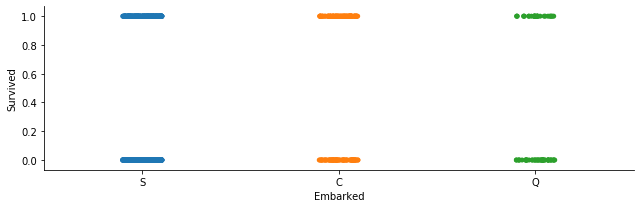

In [10]:
sns.catplot('Embarked','Survived',data=titanic_df,height=3,aspect=3)

使用了seaborn中的factorplot函数，产看它的文档发现factorplot()函数的图像的kind参数可以设为：violin、strip、bar、box。可以下去试一下，个人觉得kind='violin'是最容易看出它的分布和人数情况，也是最有用的！
下面这句话定义了一个fig图和它对应的三个子图axis1,axis2,axis3

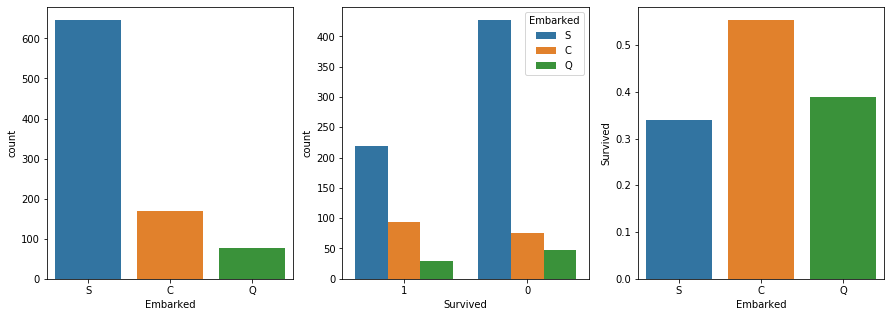

In [11]:
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)
embark_perc = titanic_df[['Embarked','Survived']].groupby(["Embarked"],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

可以将它拆分为四句话：

fig=plt.figure(figsize=(15,5))
axis1=fig.add_subplot(1,3,1)
axis2=fig.add_subplot(1,3,2)
axis2=fig.add_subplot(1,3,3)

延伸一下，在使用matplotlib的pyplot的figure定义图像时候，如果统一定义坐标轴的名称用plt的属性，例如：

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
fig.title('testdata')
fig.xlabel('age')
fig.ylabel('survived')
plt.show()
如果单独定义每个头像的坐标轴和title：
axis1=fig.add_subplot(131)
axis1.set_xlabel('age')
axis1.set_ylabel('survived')
temp1.plot()
temp1是一个DataFrame，只要plot()就默认为占用这个axis1

titanic_df[['Embarked','Survived"]].groupby(['Embarked']相当于sql语句中的groupby函数，mean()函数对它计算均值后，生成了一个数据框DataFrame。
使用pd.get_dummies()方法得到Embarked这个变量的指标，然后train和test分别右连接这个统计指标表，会产生三个新的变量：’S’，’C’，’Q’。
可能连接后’S’变量贡献度太小，删除’S’这个变量，保留’C’，’Q’，而且很显然这两列的值都是0或1的标签。

In [12]:
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

将原来的Emabrked这个变量删除：

In [13]:
titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

②‘Fare’字段：票价
如果变量是数值类型，可以用describe方法查看统计特性：

In [14]:
test_df.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [15]:
test_df.shape

(418, 10)

In [16]:
titanic_df.Fare.count()

891

In [17]:
test_df.Fare.count()

417

发现test数据中有一个Fare变量是空值，用fillna()方法填充中值：

In [18]:
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

数据处理转换，将float转换成int类型：

In [19]:
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

分别得到Fare变量对应的幸存和没有幸存的记录，（这种引用很像R语言中的which()函数）：

In [20]:
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

转换成数据框DataFrame，并作图出来：

In [21]:
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

注：直接调用plot()也是一种简单画图方法，与matplotlib.pyplot中面向对象画图一样，需要研究、、

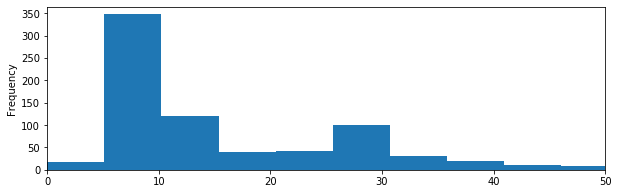

In [22]:
titanic_df['Fare'].plot(kind='hist', figsize=(10,3),bins=100, xlim=(0,50))

In [23]:
fare_not_survived.mean(), fare_survived.mean(),fare_not_survived.std(), fare_survived.std()

(21.690346083788707, 47.99122807017544, 31.392190635717164, 66.60834389984335)

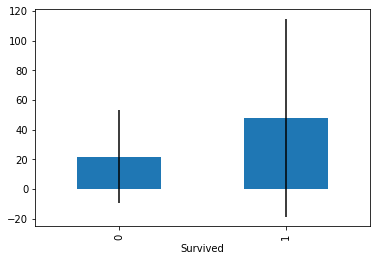

In [24]:
avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

③Age变量：年龄
面向对象画图，两个图，分别设置title：

# generate random numbers between (mean - std) & (mean + std)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


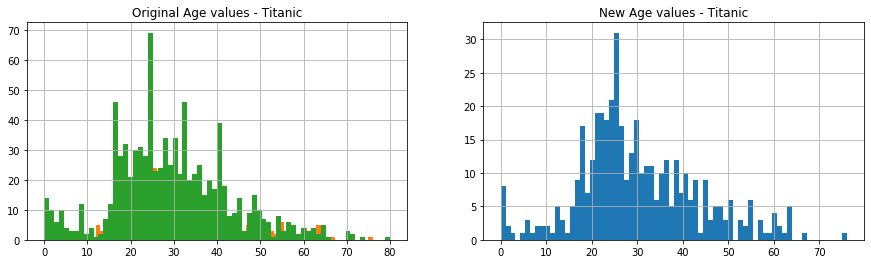

In [25]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

titanic_df['Age'].hist(bins=70, ax=axis1)
test_df['Age'].hist(bins=70, ax=axis2)

继续作图，seaborn的FaceGrid()方法，需要查一下、

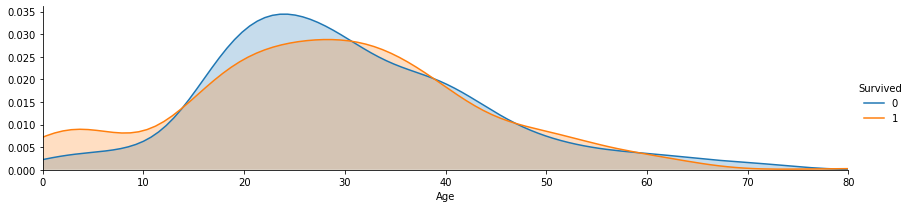

In [26]:
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

每个年龄的存活率：

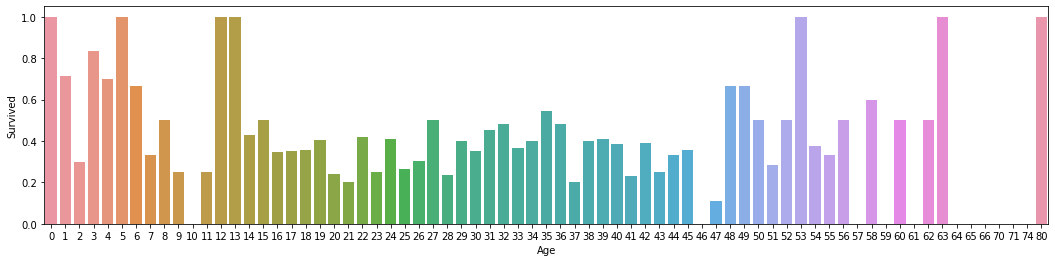

In [27]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

④Cabin变量：船舱号

In [28]:
 titanic_df.shape

(891, 10)

In [29]:
titanic_df.Cabin.count()

204

可以看到，总共891个记录，只有204个记录是非空的，而且它是一个字符型的，所以这个变量被删除了。

In [30]:
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

⑤整合Parch和SibSp变量（不太明白这两个变量的中文意思…..）
将Parch和SibSp变量整合为一个Famliy变量，作为一个取值为0和1的标签变量。

In [31]:
titanic_df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [32]:
titanic_df.Parch[titanic_df.Parch!=0].count()

213

In [33]:
titanic_df.SibSp[titanic_df.SibSp!=0].count()

283

可以发现，两者只有极少数不是0值，故：

In [34]:
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


seaborn里的countplot()方法和barplot()方法。

[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

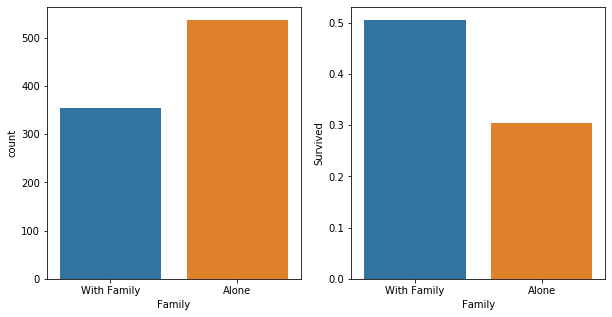

In [35]:
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()

sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)
axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [36]:
family_perc.head()

,Family,Survived
0,0,0.303538
1,1,0.505650


⑥整合变量Sex：
定义一个函数来判断age是否超过16岁，对其进行分类，小于16岁分类为’child’，大于16岁保留性别：

In [37]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

In [38]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

In [39]:
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

达到变量的指标，并将它们的columns换成'Child','Female','Male'

In [40]:
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

In [41]:
person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

In [42]:
person_dummies_titanic

,Child,Female
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
886,0,0
887,0,1
888,0,1
889,0,0


In [43]:
titanic_df

,Survived,Pclass,Age,Fare,C,Q,Family,Person
0,0,3,22,7,0,0,1,male
1,1,1,38,71,1,0,1,female
2,1,3,26,7,0,0,0,female
3,1,1,35,53,0,0,1,female
4,0,3,35,8,0,0,0,male
...,...,...,...,...,...,...,...,...
886,0,2,27,13,0,0,0,male
887,1,1,19,30,0,0,0,female
888,0,3,24,23,0,0,1,female
889,1,1,26,30,1,0,0,male


In [44]:
titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

In [45]:
titanic_df

,Survived,Pclass,Age,Fare,C,Q,Family,Person,Child,Female
0,0,3,22,7,0,0,1,male,0,0
1,1,1,38,71,1,0,1,female,0,1
2,1,3,26,7,0,0,0,female,0,1
3,1,1,35,53,0,0,1,female,0,1
4,0,3,35,8,0,0,0,male,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,13,0,0,0,male,0,0
887,1,1,19,30,0,0,0,female,0,1
888,0,3,24,23,0,0,1,female,0,1
889,1,1,26,30,1,0,0,male,0,0


In [46]:
titanic_df['Person'].to_csv('xxx.csv', index=True)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


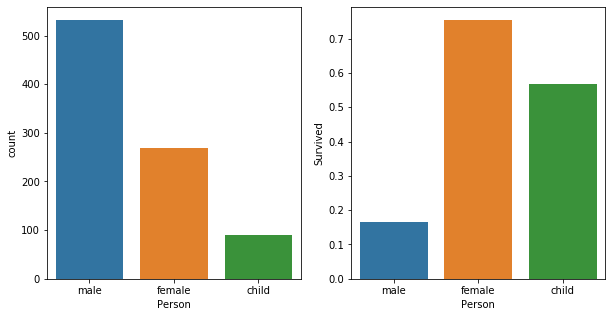

In [47]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.countplot(x='Person', data=titanic_df, ax=axis1)

person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

效果不明显，最后删了它：

In [48]:
titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

⑦Pclass变量：等级

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


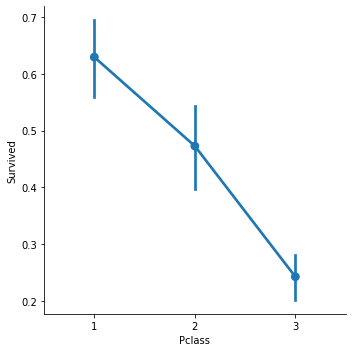

In [49]:
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
将Pclass的三个取值做成标签，并删除train和test中的class_3变量，因为它的幸存率太低了！

In [50]:
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [51]:
titanic_df

,Survived,Age,Fare,C,Q,Family,Child,Female,Class_1,Class_2
0,0,22,7,0,0,1,0,0,0,0
1,1,38,71,1,0,1,0,1,1,0
2,1,26,7,0,0,0,0,1,0,0
3,1,35,53,0,0,1,0,1,1,0
4,0,35,8,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27,13,0,0,0,0,0,0,1
887,1,19,30,0,0,0,0,1,1,0
888,0,24,23,0,0,1,0,1,0,0
889,1,26,30,1,0,0,0,0,1,0


⑧数据探索结束，将train和test的变量化为统一：

In [75]:
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

三、建立模型
此时应用sklearn包了：
①用逻辑回归去拟合X_train和Y_train，然后用logreg.predict()函数去预测X_test的数据，最后用拟合的结果去给模型打分！

In [76]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8080808080808081

②随机森林：

In [77]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9685746352413019

四、相关分析（不懂！！）：

In [249]:
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

五、生成csv，提交文件：
先构造一个数据框DataFrame

In [78]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })  

In [79]:
submission.to_csv('titanic.csv', index=False)

至于，加标签后的准确率就是你排名高低的依据了，如果变量控制的好，无效变量少，那么你的得分率肯定是很高的，如果你建立模型的时候无效的变量
很多，那拟合出的结果肯定不理想，同时，你也需要比较各种不同模型，选择一个建立模型后的score最高的一个模型提交。